## CA_Algorithms Plots

### Part 1: Kernel Ridge Regression

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# loading the dataset
data = pd.read_csv("/Users/shaozishan/Desktop/Data_Plot_BDCD/NERSC_outputs/caksvm_data_duke_linear.csv")

In [2]:
# Scaling Plot (Duke Breast Cancer Dataset)
# data = pd.read_csv("/Users/shaozishan/Desktop/Research/Parallel Machine Learning/outputs/Poly_5_pyrim_cabdcd.csv")

In [5]:
# see the details of the dataset
data.head(6)

,filename,kernel,num_process,s,blksize,degree,max_iter,Gauss_para,LAMBDA,csr_setup_time,kernel_computation,allreduce_time,sample_time,csr_read_time,gradient_comp_time,alpha_update,memory_reset,major_time,runtime
0,mnist.scale,gauss,512,64,1,5,640,1.0,1.0,0.727812,0.000190,0.005112,4.820000e-08,7.000000e-08,0.000138,0.000003,0.000394,0.005837,4.464031
1,mnist.scale,gauss,512,32,1,5,640,1.0,1.0,0.356599,0.000189,0.004918,5.720000e-08,9.000000e-08,0.000162,0.000004,0.000316,0.005588,3.933139
2,mnist.scale,gauss,512,16,1,5,640,1.0,1.0,0.347187,0.000513,0.003845,9.190000e-08,2.400000e-07,0.000187,0.000005,0.000188,0.004739,3.380318
3,mnist.scale,gauss,512,8,1,5,640,1.0,1.0,0.350178,0.000243,0.003834,1.558000e-07,8.000000e-08,0.000108,0.000010,0.000090,0.004286,3.093368
4,mnist.scale,gauss,512,4,1,5,640,1.0,1.0,0.346369,0.000240,0.003502,1.495000e-07,8.000000e-08,0.000052,0.000004,0.000054,0.003852,2.811840
5,mnist.scale,gauss,512,2,1,5,640,1.0,1.0,0.341321,0.000233,0.003712,1.323000e-07,8.000000e-08,0.000075,0.000004,0.000048,0.004073,2.948515


In [14]:
# get the data with blksize = 1, np = 32
df = data[(data['num_process'] == 32) & (data['blksize'] == 1)]
df.head(7)

,filename,kernel,num_process,s,blksize,degree,max_iter,Gauss_para,LAMBDA,csr_setup_time,kernel_computation,allreduce_time,sample_time,csr_read_time,gradient_comp_time,alpha_update,memory_reset,major_time,runtime
84,duke,linear,32,64,1,5,12800,0.0001,0.00001,0.212894,0.000006,0.000007,8.860000e-08,0.179825,6.411000e-07,1.100000e-09,5.410000e-08,0.000013,0.561854
85,duke,linear,32,32,1,5,12800,0.0001,0.00001,0.213790,0.000007,0.000005,1.173000e-07,0.188980,6.649000e-07,1.600000e-09,1.660000e-08,0.000013,0.568582
86,duke,linear,32,16,1,5,12800,0.0001,0.00001,0.193739,0.000008,0.000007,1.108000e-07,0.167282,6.826000e-07,2.500000e-09,2.170000e-08,0.000016,0.560861
87,duke,linear,32,8,1,5,12800,0.0001,0.00001,0.193126,0.000010,0.000009,1.284000e-07,0.179617,6.691000e-07,4.500000e-09,2.230000e-08,0.000020,0.623134
88,duke,linear,32,4,1,5,12800,0.0001,0.00001,0.204287,0.000012,0.000013,1.457000e-07,0.205002,6.655000e-07,8.800000e-09,3.050000e-08,0.000026,0.738632
89,duke,linear,32,2,1,5,12800,0.0001,0.00001,0.190912,0.000018,0.000016,2.289000e-07,0.197493,7.209000e-07,1.720000e-08,5.760000e-08,0.000035,0.837191
90,duke,linear,32,0,1,5,12800,0.0001,0.00001,0.176035,0.000031,0.000032,1.600000e-07,0.170577,7.465000e-07,3.310000e-08,7.180000e-08,0.000064,1.165535


# Make the General Plot

<class 'list'>


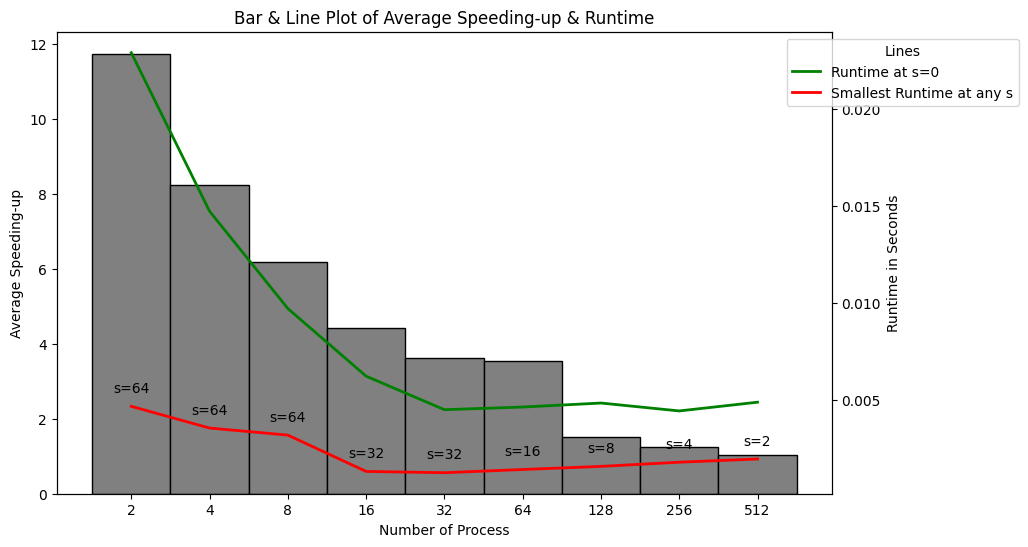

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your dataframe containing the mentioned columns
# Sample data:
# df = pd.DataFrame({
#     'blksize': [...],
#     's': [...],
#     'num_processes': [...],
#     'runtime': [...],
#     'kernel': [...],
#     'allreduce_time': [...]
# })

df = data

# Calculating the average speeding-up and smallest runtime
avg_speedup = []
runtime_s_0 = []
min_runtime_s = []

print(type(min_runtime_s))
'''
for num_process in df['num_process'].unique():
    subset_df = df[df['num_process'] == num_process]
    runtime_s_0_value = subset_df[subset_df['s'] == 0]['major_time'].mean()
    # runtime_s_0.append(runtime_s_0_value)
    runtime_s_0 = np.concatenate(([runtime_s_0_value], runtime_s_0))
    min_runtime = subset_df['major_time'].min()
    min_runtime_s.append(min_runtime)
    speedup = runtime_s_0_value / min_runtime
    avg_speedup.append(speedup)
'''

for num_process in df['num_process'].unique():
    subset_df = df[df['num_process'] == num_process]
    runtime_s_0_value = subset_df[subset_df['s'] == 0]['major_time'].min()
    
    # Inserting at the beginning of the list to reverse the order
    runtime_s_0.insert(0, runtime_s_0_value)
    
    min_runtime = subset_df['major_time'].min()
    # min_runtime_s.insert(0, min_runtime) # Inserting here as well
    min_runtime_s.append(min_runtime)
    
    speedup = runtime_s_0_value / min_runtime
    avg_speedup.insert(0, speedup) # Inserting here as well




# ... (Same as above, including DataFrame and calculations)


# Calculating the 's' value corresponding to the smallest runtime
s_values_min_runtime = [df[(df['num_process'] == num_process) & (df['major_time'] == min_runtime)]['s'].iloc[0]
                        for num_process, min_runtime in zip(df['num_process'].unique(), min_runtime_s)]

reversed = []

for elts in s_values_min_runtime:
    reversed.insert(0,elts)


'''
s_values_min_runtime = []
for num_process, min_runtime in zip(df['num_process'].unique(), min_runtime_s):
    filtered_s = df[(df['num_process'] == num_process) & (df['major_time'] == min_runtime)]['s']
    print(filtered_s)
    if not filtered_s.empty:
        s_values_min_runtime.append(filtered_s.iloc[0])
    else:
        # Handle the case where no matching rows are found
        s_values_min_runtime.append(None)  # Or another appropriate value
'''

# Getting unique num_processes values
unique_num_processes = sorted(df['num_process'].unique())

# Plotting the bar plot
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(range(len(unique_num_processes)), avg_speedup, color='gray', edgecolor='black', width=1)
ax1.set_xlabel('Number of Process')
ax1.set_ylabel('Average Speeding-up')
ax1.set_title('Bar & Line Plot of Average Speeding-up & Runtime')
plt.xticks(range(len(unique_num_processes)), unique_num_processes) # Setting x-axis ticks to unique values

# Creating a second y-axis for the line plot
ax2 = ax1.twinx()
ax2.set_ylabel('Runtime in Seconds')

# Line plots
line1, = ax2.plot(range(len(unique_num_processes)), runtime_s_0, 'g-', label='Runtime at s=0', linewidth=2)
line2, = ax2.plot(range(len(unique_num_processes)), min_runtime_s, 'r-', label='Smallest Runtime at any s', linewidth=2)

# Adding s-value annotations  # s_values_min_runtime
for i, y, s_value in zip(range(len(unique_num_processes)), min_runtime_s, reversed):
    plt.annotate(f's={s_value}', (i, y), textcoords="offset points", xytext=(0,10), ha='center')

# Adding a legend
ax2.legend(handles=[line1, line2], loc='upper right', title='Lines', bbox_to_anchor=(1.25, 1))

# Saving the plot
plt.savefig('mixed_plot_with_unique_x.png')
plt.show()


### Improved Version 1

<class 'list'>


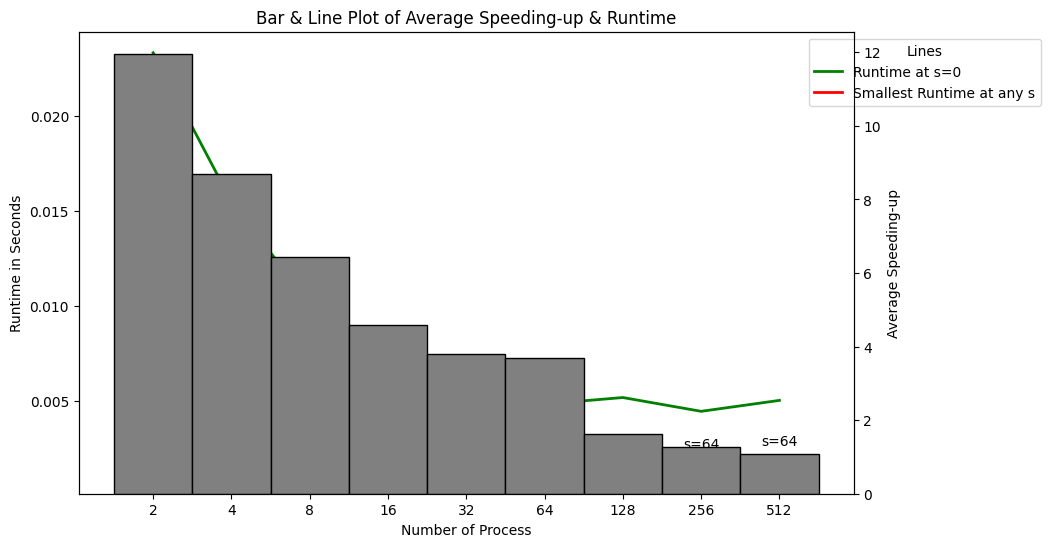

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your dataframe containing the mentioned columns
# Sample data:
# df = pd.DataFrame({
#     'blksize': [...],
#     's': [...],
#     'num_processes': [...],
#     'runtime': [...],
#     'kernel': [...],
#     'allreduce_time': [...]
# })

df = data

# Calculating the average speeding-up and smallest runtime
avg_speedup = []
runtime_s_0 = []
min_runtime_s = []

print(type(min_runtime_s))
'''
for num_process in df['num_process'].unique():
    subset_df = df[df['num_process'] == num_process]
    runtime_s_0_value = subset_df[subset_df['s'] == 0]['major_time'].mean()
    # runtime_s_0.append(runtime_s_0_value)
    runtime_s_0 = np.concatenate(([runtime_s_0_value], runtime_s_0))
    min_runtime = subset_df['major_time'].min()
    min_runtime_s.append(min_runtime)
    speedup = runtime_s_0_value / min_runtime
    avg_speedup.append(speedup)
'''

for num_process in df['num_process'].unique():
    subset_df = df[df['num_process'] == num_process]
    runtime_s_0_value = subset_df[subset_df['s'] == 0]['major_time'].mean()
    
    # Inserting at the beginning of the list to reverse the order
    runtime_s_0.insert(0, runtime_s_0_value)
    
    min_runtime = subset_df['major_time'].min()
    # min_runtime_s.insert(0, min_runtime) # Inserting here as well
    min_runtime_s.append(min_runtime)
    
    speedup = runtime_s_0_value / min_runtime
    avg_speedup.insert(0, speedup) # Inserting here as well




# ... (Same as above, including DataFrame and calculations)


# Calculating the 's' value corresponding to the smallest runtime
s_values_min_runtime = [df[(df['num_process'] == num_process) & (df['major_time'] == min_runtime)]['s'].iloc[0]
                        for num_process, min_runtime in zip(df['num_process'].unique(), min_runtime_s)]


# Getting unique num_processes values
unique_num_processes = sorted(df['num_process'].unique())

# Plotting the bar plot
fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.set_xlabel('Number of Process')
ax1.set_ylabel('Runtime in Seconds')

# Adding s-value annotations
for i, y, s_value in zip(range(len(unique_num_processes)), min_runtime_s, s_values_min_runtime):
    plt.annotate(f's={s_value}', (i, y), textcoords="offset points", xytext=(0,10), ha='center')

# Adding a legend
ax1.legend(handles=[line1, line2], loc='upper right', title='Lines', bbox_to_anchor=(1.25, 1))


# Creating a second y-axis for the line plot
ax2 = ax1.twinx()
ax2.set_ylabel('Average Speeding-up')

# Line plots
line1, = ax1.plot(range(len(unique_num_processes)), runtime_s_0, 'g-', label='Runtime at s=0', linewidth=2)
line2, = ax1.plot(range(len(unique_num_processes)), min_runtime_s, 'r-', label='Smallest Runtime at any s', linewidth=2)


ax2.bar(range(len(unique_num_processes)), avg_speedup, color='gray', edgecolor='black', width=1)
ax2.set_title('Bar & Line Plot of Average Speeding-up & Runtime')
plt.xticks(range(len(unique_num_processes)), unique_num_processes) # Setting x-axis ticks to unique values


# Saving the plot
plt.savefig('mixed_plot_with_unique_x.png')
plt.show()


[1]


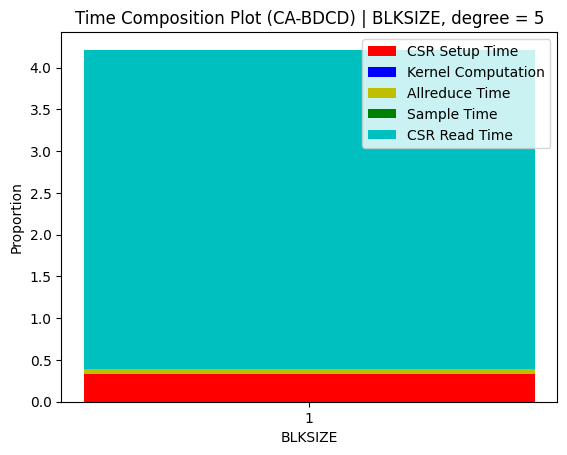

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# df = data

# group the data by the blksize
# in this case, let's focus on the data with process = 8, s = 3, and blksize range from 10 to 60
# df = data[(data['num_process'] == 512) & (data['s'] == 0)]
df = data# [(data['s'] == 0)]

# print(df.head())

print(df["blksize"].unique())

# find the row sum
df['Total'] = df.iloc[:, 4:].sum(axis=1)


# Set the BLKSIZE as the x-axis labels
blksize_labels = df['blksize'].astype(str)


# Set the bar plot data
bar_data = np.array([
    df['csr_setup_time'].tolist(),
    df['kernel_computation'].tolist(),
    df['allreduce_time'].tolist(),
    df['sample_time'].tolist(),
    df['csr_read_time'].tolist()
])


# create data
y1 = bar_data[0]
y2 = bar_data[1]
y3 = bar_data[2]
y4 = bar_data[3]
y5 = bar_data[4]
 
# plot bars in stack manner
plt.bar(blksize_labels, y1, color='r')
plt.bar(blksize_labels, y2, bottom=y1, color='b')
plt.bar(blksize_labels, y3, bottom=y1+y2, color='y')
plt.bar(blksize_labels, y4, bottom=y1+y2+y3, color='g')
plt.bar(blksize_labels, y5, bottom=y1+y2+y3+y4, color='c')
plt.xlabel('BLKSIZE')
plt.ylabel('Proportion')
plt.legend(['CSR Setup Time', 'Kernel Computation', 'Allreduce Time', 'Sample Time', 'CSR Read Time'])
plt.title('Time Composition Plot (CA-BDCD) | BLKSIZE, degree = 5')
plt.show()


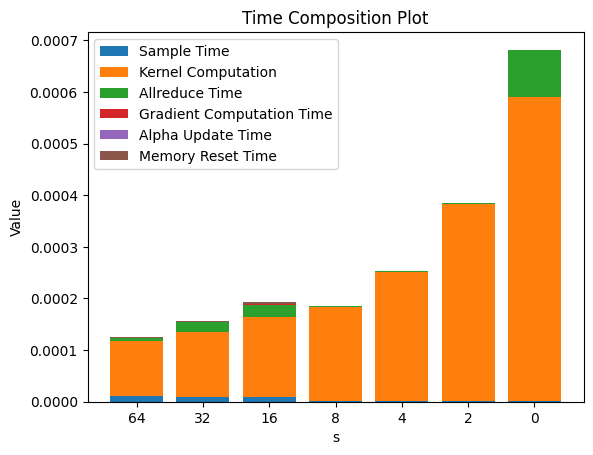

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = data[(data['num_process'] == 2)]
          
# Assuming df is your DataFrame, sorted by 's'
s_values = df['s'].unique()
# s_values = sorted(s_values)
x_ticks = np.arange(len(s_values))


# Plot the stacked bar chart
#plt.bar(x_ticks, df['csr_setup_time'], label='CSR Setup Time')
#plt.bar(x_ticks, df['kernel_computation'], bottom=df['csr_setup_time'], label='Kernel Computation')
#plt.bar(x_ticks, df['kernel_computation'], bottom=df['csr_setup_time'], label='Kernel Computation')
#plt.bar(x_ticks, df['allreduce_time'], bottom=(df['csr_setup_time'] + df['kernel_computation']), label='Allreduce Time')
#plt.bar(x_ticks, df['sample_time'], bottom=(df['csr_setup_time'] + df['kernel_computation'] + df['allreduce_time']), label='Sample Time')
#plt.bar(x_ticks, df['csr_read_time'], bottom=(df['csr_setup_time'] + df['kernel_computation'] + df['allreduce_time'] + df['sample_time']), label='CSR Read Time')
# sample_time	csr_read_time	gradient_comp_time	alpha_update	memory_reset
plt.bar(x_ticks, df['sample_time'], label='Sample Time')
plt.bar(x_ticks, df['kernel_computation'], bottom=df['sample_time'], label='Kernel Computation')
plt.bar(x_ticks, df['allreduce_time'], bottom=(df['sample_time'] + df['kernel_computation']), label='Allreduce Time')
plt.bar(x_ticks, df['gradient_comp_time'], bottom=(df['sample_time'] + df['kernel_computation'] + df['allreduce_time']), label='Gradient Computation Time')
plt.bar(x_ticks, df['alpha_update'], bottom=(df['sample_time'] + df['kernel_computation'] + df['allreduce_time'] + df['gradient_comp_time']), label='Alpha Update Time')
plt.bar(x_ticks, df['memory_reset'], bottom=(df['sample_time'] + df['kernel_computation'] + df['allreduce_time'] + df['gradient_comp_time'] + df['alpha_update']), label='Memory Reset Time')



# Add labels and legend
plt.xlabel('s')
plt.ylabel('Value')
plt.title('Time Composition Plot')
plt.xticks(x_ticks, s_values)  # Set x-tick labels to the values of 's'
plt.legend()

# Show the plot
plt.show()
